Linear Regression MSE (Player Value): 3.9683996656124902, R2: 0.31092994064560575
Ridge MSE (Player Value): 3.968407156832237, R2: 0.31092863987560515
Lasso MSE (Player Value): 5.674788865867636, R2: 0.014633749087482717
XGBoost MSE (Player Value): 0.23656551569248238, R2: 0.9589229342618991
Random Forest MSE (Player Value): 0.23951122731774036, R2: 0.9584114430171925
KNN MSE (Player Value): 2.3065181687195335, R2: 0.5994978466524354
Best model: XGBoost with MSE: 0.23656551569248238 and R2: 0.9589229342618991


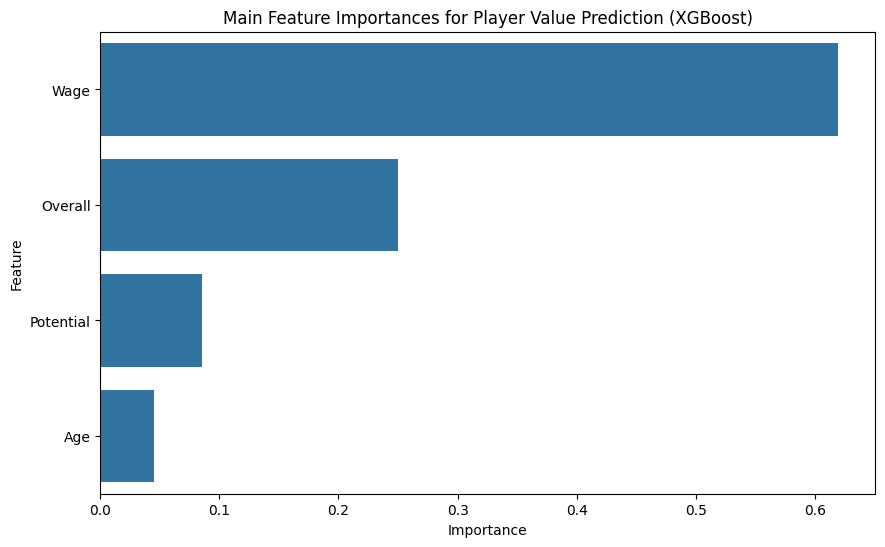

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Loaded the cleaned data
df = pd.read_csv('../Dataset/Cleaned/combinedCleanedData_20240709_145255.csv')

# Log transformation for Player Value
df['Log_Value'] = np.log1p(df['Value'])

# Define a function to evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Created a pipeline
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# Player Value Prediction
features_player_value = ['Age', 'Overall', 'Potential', 'Wage']
X_player_value = df[features_player_value]
y_player_value = df['Log_Value']

X_train_player, X_test_player, y_train_player, y_test_player = train_test_split(X_player_value, y_player_value, test_size=0.2, random_state=42)

# Defined models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XGBoost': XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'KNN': KNeighborsRegressor()
}

# Evaluated the models
results = {}
for name, model in models.items():
    pipeline = create_pipeline(model)
    mse, r2 = evaluate_model(pipeline, X_train_player, y_train_player, X_test_player, y_test_player)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} MSE (Player Value): {mse}, R2: {r2}")

# Identification of the best model
best_model_name = min(results, key=lambda k: results[k]['MSE'])
print(f"Best model: {best_model_name} with MSE: {results[best_model_name]['MSE']} and R2: {results[best_model_name]['R2']}")

# Feature Importance for the best model
best_model = create_pipeline(models[best_model_name])
best_model.fit(X_train_player, y_train_player)
if best_model_name == 'XGBoost' or best_model_name == 'Random Forest':
    importances = best_model.named_steps['model'].feature_importances_
    feature_names = X_player_value.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
    plt.title(f'Main Feature Importances for Player Value Prediction ({best_model_name})')
    plt.show()
else:
    print(f"Feature importance is not available for {best_model_name}")
    



In [21]:
# Function to accept user input and make predictions
def predict_player_value():
    input_data = {
        'Age': int(input("Enter Age of the player: ")),
        'Overall': int(input("Enter Overall of the player: ")),
        'Potential': int(input("Enter Potential of the player: ")),
        'Wage': float(input("Enter Wage of the player: "))
    }
    input_df = pd.DataFrame([input_data])
    prediction = best_model.predict(input_df)
    return np.expm1(prediction)[0]  # Reverse log transformation

# Make predictions based on user input
predicted_value = predict_player_value()
print(f"Predicted Player Value: {predicted_value}")

Predicted Player Value: 69172272.0


EXAMPLE OF PARAMETERS 
Age - 19
0verall = 50-90
potential= 50-90
wage= 100000- 350000


In [20]:
# Function to accept player name and make predictions
def predict_player_value_by_name(player_name):
    player_data = df[df['Name'] == player_name][features_player_value]
    if player_data.empty:
        print(f"Player {player_name} not found in the dataset.")
        return None
    prediction = best_model.predict(player_data)
    return np.expm1(prediction)[0]  # Reverse log transformation

# Make predictions based on player name
player_name = input("Enter Player Name: ")
predicted_value = predict_player_value_by_name(player_name)
if predicted_value is not None:
    print(f"Predicted Player Value for {player_name}: {predicted_value}")

Predicted Player Value for Cristiano Ronaldo: 47230540.0


Example of players that can be checked L. Messi
M. Neuer
K. De Bruyne
Bruno Fernandes
A. Griezmann
M. Acuña
Alex Telles
Paulinho
R. Nainggolan



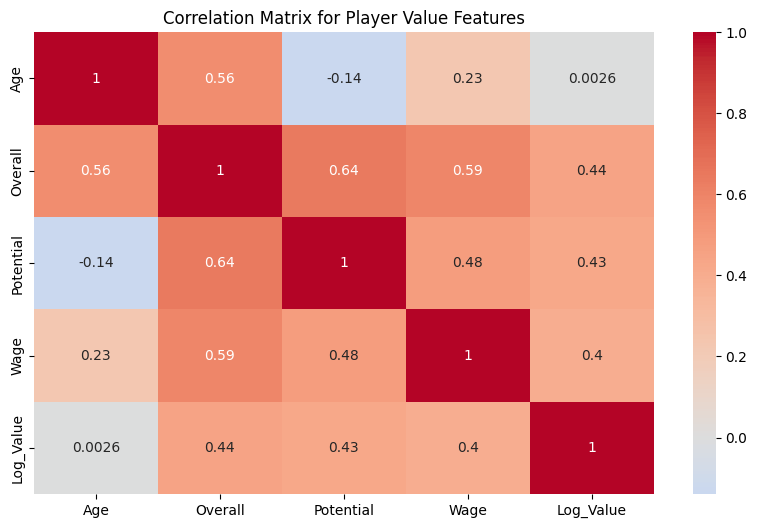

In [15]:
# Calculate and plot the correlation matrix
correlation_matrix = df[features_player_value + ['Log_Value']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Player Value Features')
plt.show()